In [5]:
import torch

from GLOBALS import *
from alg_nets import *
from alg_replay_buffer import ReplayBuffer
from play import play

In [202]:
critic = CriticNet(obs_size=env.observation_size(), n_actions=env.action_size(), n_agents=1)
target_critic = CriticNet(obs_size=env.observation_size(), n_actions=env.action_size(), n_agents=1)
# target_critic.load_state_dict(critic.state_dict())

Entropy

In [203]:
from scipy.stats import entropy

In [204]:
list_of_params = list(critic.parameters())
list_of_target_params = list(target_critic.parameters())

In [205]:
entropy(list_of_params[0][0].detach().numpy(), list_of_target_params[0][0].detach().numpy())

inf

In [230]:
a = list_of_params[2][3].softmax(dim=0).detach().numpy()
a.shape

(256,)

In [231]:
b = list_of_target_params[2][3].softmax(dim=0).detach().numpy()
b

array([0.00394017, 0.00381952, 0.00372287, 0.00385827, 0.00399872,
       0.00410866, 0.0038972 , 0.00385002, 0.00373159, 0.00398387,
       0.00411541, 0.00376812, 0.00379492, 0.00412134, 0.00409581,
       0.00370561, 0.00411102, 0.00368964, 0.0037239 , 0.00409728,
       0.00406275, 0.00366132, 0.00398391, 0.00386641, 0.0038995 ,
       0.00397711, 0.00400582, 0.00408799, 0.0037787 , 0.00404046,
       0.00387154, 0.00399261, 0.00371998, 0.00367661, 0.0036767 ,
       0.00399973, 0.00396752, 0.00378041, 0.00374877, 0.00368744,
       0.00397179, 0.00381471, 0.00394486, 0.00379528, 0.00400946,
       0.00392658, 0.00412521, 0.00367081, 0.00393088, 0.00414277,
       0.00409211, 0.0038659 , 0.00382923, 0.0037614 , 0.0039377 ,
       0.00367865, 0.00394213, 0.00394284, 0.00398181, 0.00374146,
       0.00366315, 0.00407567, 0.00399736, 0.00410405, 0.00393536,
       0.00393305, 0.00407434, 0.00398339, 0.00366927, 0.00380705,
       0.00407224, 0.00405507, 0.0038287 , 0.0037422 , 0.00383

In [232]:
from math import log

In [233]:
"""
# H(P, Q) = H(P) + KL(P || Q)
# Where H(P, Q) is the cross-entropy of Q from P,
# H(P) is the entropy of P and
# KL(P || Q) is the divergence of Q from P.
"""

# calculate entropy H(P)
def entropy(p):
	return -sum([p[i] * log(p[i]) for i in range(len(p))])
# calculate cross entropy
def cross_entropy(p, q):
	return -sum(pp * log(qq) for pp, qq in zip(p, q))
# calculate the kl divergence KL(P || Q)
def kl_divergence(p, q):
	return sum(p[i] * log(p[i]/q[i]) for i in range(len(p)))

In [234]:
kl_divergence(a,b)

0.0012673328184329457

In [235]:
cross_entropy(a,b)

5.54579295517627

In [236]:
entropy(a)

5.544525619938485

In [237]:
entropy(a) + kl_divergence(a,b)


5.545792952756917

In [2]:
import numpy as np
def OUNoise():
    theta = 0.15
    sigma = 0.3
    mu = 0
    state = 0
    while True:
        yield state
        state += theta * (mu - state) + sigma * np.random.randn()

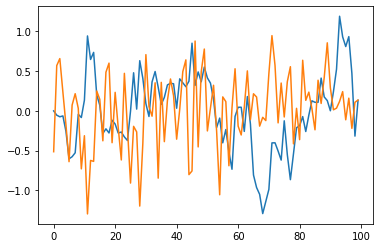

In [3]:
import matplotlib.pyplot as plt
import torch
noise = OUNoise()
list_of_v1 = []
list_of_v2 = []
for i in range(100):
	list_of_v1.append(next(noise))
	list_of_v2.append( torch.normal(mean=torch.tensor(0.0), std=torch.tensor(0.5)))
plt.plot(list_of_v1)
plt.plot(list_of_v2)

tensor(0.0316, grad_fn=<MaxBackward1>)
tensor(-0.0316, grad_fn=<MinBackward1>)
tensor(0.1642, grad_fn=<MaxBackward1>)
tensor(-0.1443, grad_fn=<MinBackward1>)


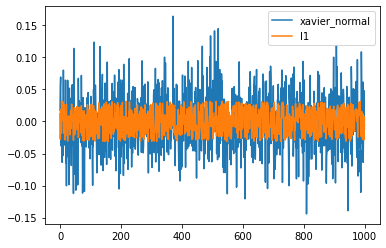

In [90]:
w = nn.Linear(1000, 1)
# print(w.weight)
print(torch.max(w.weight))
print(torch.min(w.weight))
l1 = w.weight.detach().squeeze().numpy().copy()
nn.init.xavier_normal_(w.weight)
# print(w.weight)
print(torch.max(w.weight))
print(torch.min(w.weight))
l2 = w.weight.detach().squeeze().numpy()
plt.plot(l2, label='xavier_normal')
plt.plot(l1, label='l1')
plt.legend()


In [110]:
import matplotlib.pyplot as plt
import numpy as np

m = np.ndarray((100,100))
count = 0
for c in range(100):
    for l in range(100):
        m[c, l] = count
        count += 1

m

array([[0.000e+00, 1.000e+00, 2.000e+00, ..., 9.700e+01, 9.800e+01,
        9.900e+01],
       [1.000e+02, 1.010e+02, 1.020e+02, ..., 1.970e+02, 1.980e+02,
        1.990e+02],
       [2.000e+02, 2.010e+02, 2.020e+02, ..., 2.970e+02, 2.980e+02,
        2.990e+02],
       ...,
       [9.700e+03, 9.701e+03, 9.702e+03, ..., 9.797e+03, 9.798e+03,
        9.799e+03],
       [9.800e+03, 9.801e+03, 9.802e+03, ..., 9.897e+03, 9.898e+03,
        9.899e+03],
       [9.900e+03, 9.901e+03, 9.902e+03, ..., 9.997e+03, 9.998e+03,
        9.999e+03]])

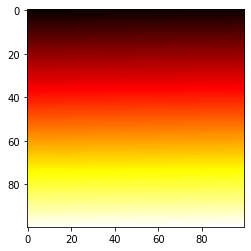

In [111]:
a = np.random.random((16, 16))
plt.imshow(m, cmap='hot', interpolation='nearest')
plt.show()